In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [7]:
data=pd.read_csv(r"C:\Users\johnson\Downloads\dataset_dm9_lbv39rog (6)\Dataset\cars.csv")

In [8]:
data.head()

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,7,5.0
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,11,9.0
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,1,4.0
3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.0,25000.0,Diesel,Mumbai,2,4.0
4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai,14,9.0


In [10]:
df=pd.DataFrame(data)
df.head(2)

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,7,5.0
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,11,9.0


#UNIVARIANT ANALYSIS

In [13]:

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1725 non-null   int64  
 1   year                     1725 non-null   int64  
 2   brand                    1725 non-null   object 
 3   full_model_name          1725 non-null   object 
 4   model_name               1725 non-null   object 
 5   price                    1725 non-null   float64
 6   distance_travelled(kms)  1725 non-null   float64
 7   fuel_type                1725 non-null   object 
 8   city                     1725 non-null   object 
 9   brand_rank               1725 non-null   int64  
 10  car_age                  1725 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 148.4+ KB


In [12]:
df.describe()




,Id,year,price,distance_travelled(kms),brand_rank,car_age
count,1725.000000,1725.000000,1.725000e+03,1725.000000,1725.000000,1725.000000
mean,862.000000,2015.390725,1.494837e+06,53848.256232,15.731014,5.609275
std,498.108924,3.207504,1.671658e+06,44725.541963,12.951122,3.207504
min,0.000000,1990.000000,6.250000e+04,350.000000,1.000000,0.000000
25%,431.000000,2013.000000,5.450000e+05,29000.000000,5.000000,3.000000
50%,862.000000,2016.000000,8.750000e+05,49000.000000,14.000000,5.000000
75%,1293.000000,2018.000000,1.825000e+06,70500.000000,24.000000,8.000000
max,1724.000000,2021.000000,1.470000e+07,790000.000000,81.000000,31.000000


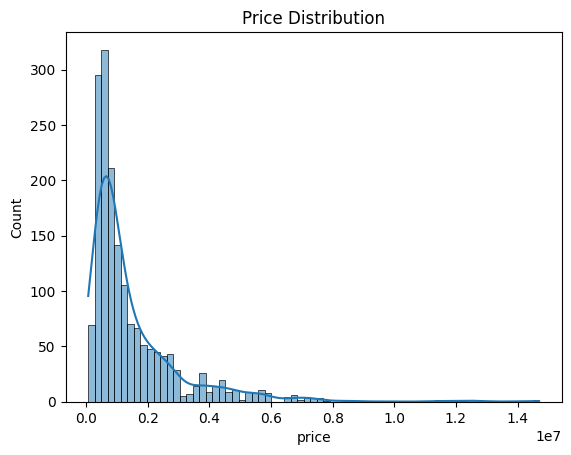

In [14]:
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

#MULTIVARIANT ANALYSIS

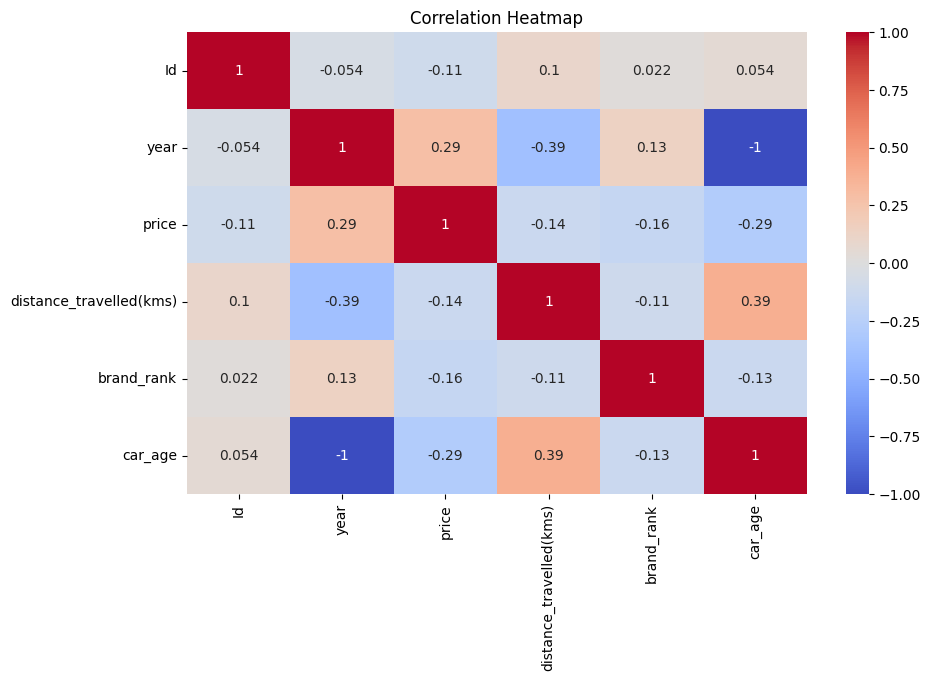

In [19]:

plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [20]:
df_model = df.copy()

In [21]:


label_cols = df_model.select_dtypes(include='object').columns
le = LabelEncoder()
for col in label_cols:
    df_model[col] = le.fit_transform(df_model[col])

#REGRESSION MODELLING

In [22]:
X = df_model.drop('price', axis=1)
y = df_model['price']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)


In [25]:
print("Linear Regression:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_preds)))
print("R2 Score:", r2_score(y_test, lr_preds))

Linear Regression:
RMSE: 1574337.6420374722
R2 Score: 0.2616834225927097


In [26]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [27]:
print("Random Forest:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("R2 Score:", r2_score(y_test, rf_preds))

Random Forest:
RMSE: 969777.6147646548
R2 Score: 0.7198496488830632


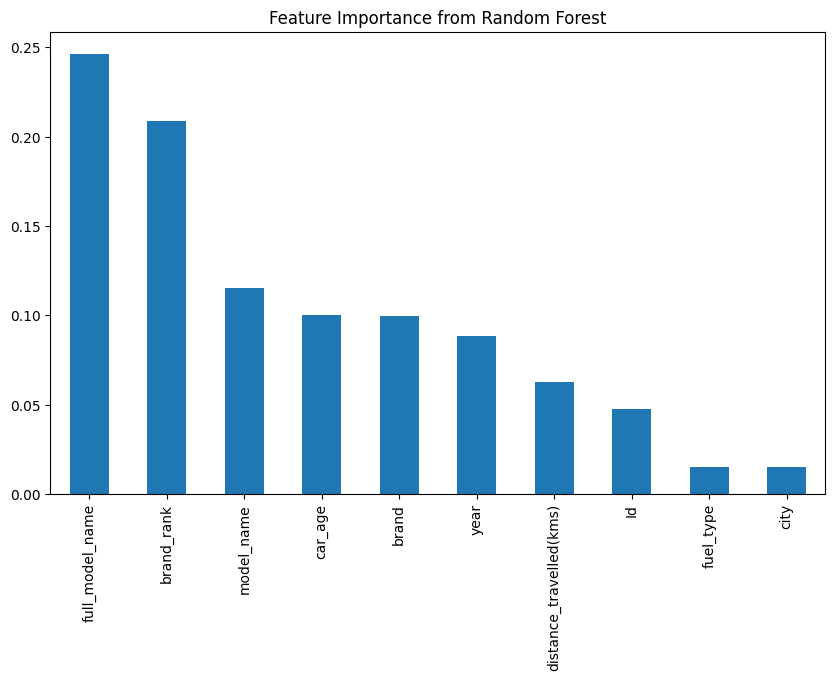

In [28]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title('Feature Importance from Random Forest')
plt.show()

In [30]:
## Conclusion

#- I built two regression models to predict the price of used cars.
#- The **Random Forest Regressor** outperformed the **Linear Regression** model based on R² and RMSE.
#- Most important features affecting price:
 # - `car_age`
 # - `distance_travelled(kms)`
 # - `brand_rank`
 # - `fuel_type`
#- The model can now help "MyCars" automate and optimize their used car pricing strategy.
